In [1]:
import numpy as np
import os
import pandas as pd

# Load the .npz file
with np.load('cifar4-train.npz') as data:
    cifar4_data = dict(data.items())

print('It is a dictionary with keys:', list(cifar4_data.keys()))

It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
O=cifar4_data['overfeat']
Y=cifar4_data['labels']
Z=cifar4_data['names']
P=cifar4_data['pixels']

## Proportion of imagines in each class

In [3]:
# Image distribution
pd.value_counts(Z, normalize=True)

car         0.25
airplane    0.25
truck       0.25
ship        0.25
dtype: float64

### the classes are uniformally distributed so the accuracy of the most-frequent baseline is 25%

#  Plot 10 Imagines from each class

In [4]:
df_class=pd.DataFrame(Y)

In [5]:
df_list=df_class.loc[df_class[0] == 0].head(10)
df_list=df_list.append(df_class.loc[df_class[0] == 1].head(10))
df_list=df_list.append(df_class.loc[df_class[0] == 2].head(10))
df_list=df_list.append(df_class.loc[df_class[0] == 3].head(10))
df_list['index']=df_list.index
df_list.drop(labels=[0], inplace=True)
df_list.reset_index(inplace=True)
df_list=df_list['index']

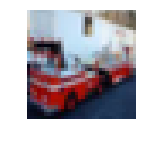

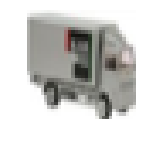

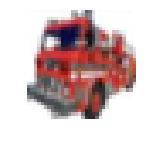

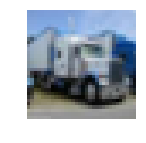

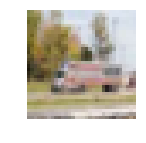

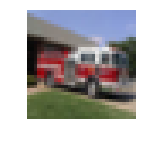

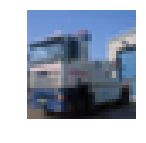

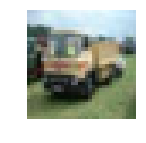

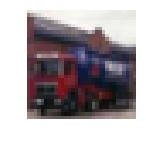

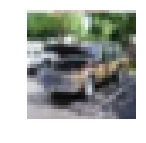

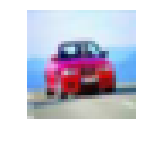

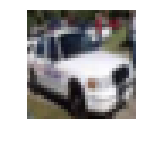

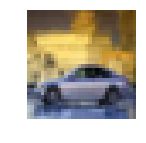

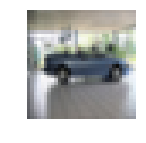

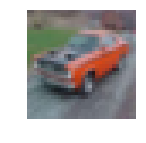

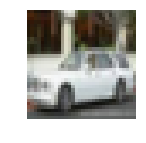

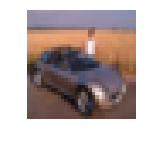

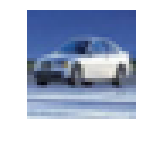

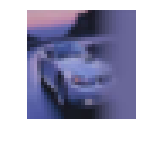

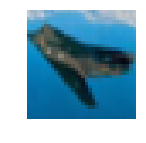

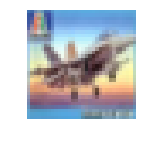

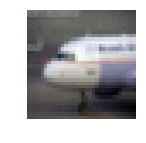

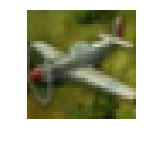

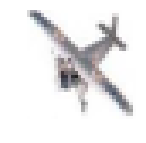

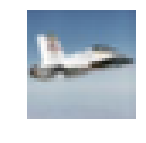

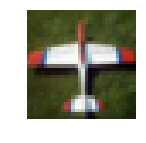

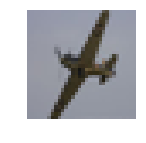

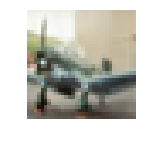

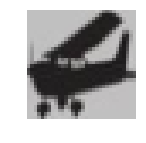

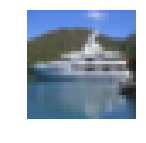

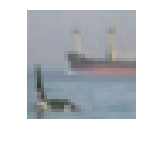

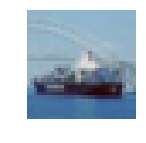

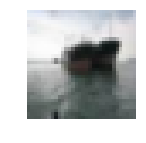

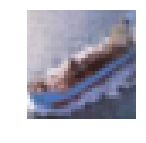

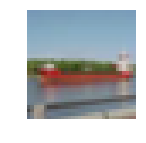

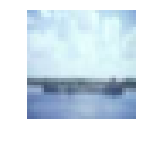

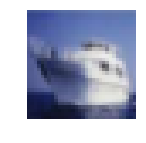

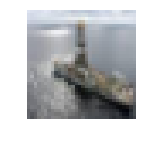

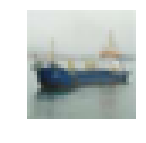

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Function to plot images based on an index
def show_image(idx, X, y):
    # Print its label
    label = y[idx]
    
    
    # Get image pixels
    flat_img = cifar4_data['pixels'][idx] # has shape (3072,)
    
    # shape the data into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    img = img/255 # I Normalize the values between [0,1]
    
    # Plot the image
    plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
    plt.imshow(img)
    plt.axis('off') # Hide the x- and y-axis
    plt.show()
i=0 

for i in range(39):
    show_image(df_list[i], cifar4_data['pixels'], cifar4_data['labels'] )


# Screenplot of OverFeat Features

In [9]:
from sklearn.decomposition import PCA


# Create PCA transformer
pca = PCA(n_components=None)
pca.fit(O)

# Proportion of variance explained
pve = pca.explained_variance_ratio_

In [10]:
df_contributions=pd.DataFrame(pve)
df_contributions.sort_values(by=[0], ascending=False, inplace=True)
df_contributions['cumulative']=df_contributions.cumsum()*100


In [11]:
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns

Text(0.5,1,'Screen Plot (Cumulative Sum)')

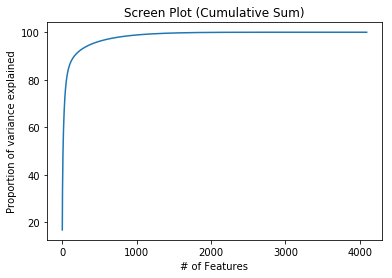

In [12]:
ax=plt.axes()

ax.plot(df_contributions['cumulative'])
plt.ylabel("Proportion of variance explained")
plt.xlabel("# of Features")
plt.title("Screen Plot (Cumulative Sum)")

### The first 2 components explain the 25% of the PVE

In [13]:
print('the first 2 components explain the 25% of the variability')
df_contributions['cumulative'].head(2)

the first 2 components explain the 25% of the variability


0    16.782648
1    24.975603
Name: cumulative, dtype: float32

### # of components to have PVE for 80%,85%,95% and 99%

In [14]:
print('•How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?')
print(df_contributions['cumulative'].loc[(df_contributions['cumulative']>=80)].head(1))
print(df_contributions['cumulative'].loc[(df_contributions['cumulative']>=85)].head(1))
print(df_contributions['cumulative'].loc[(df_contributions['cumulative']>=90)].head(1))
print(df_contributions['cumulative'].loc[(df_contributions['cumulative']>=99)].head(1))

•How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?
57    80.226692
Name: cumulative, dtype: float32
87    85.101555
Name: cumulative, dtype: float32
163    90.027199
Name: cumulative, dtype: float32
1057    99.001595
Name: cumulative, dtype: float32


# 2D plot of OverFeat Features

In [15]:
# Create PCA transformer for just the 2 principal components for OverFeat
pca2 = PCA(n_components=2)
pca2.fit(O)

overfeat_components = pca.transform(O[:500])
labels=Y[:500]

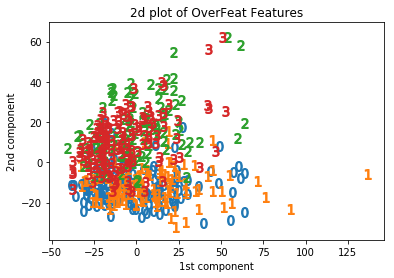

In [16]:
# Group images by digit
for label in range(10): # 0,1,2,3..9
    # Images of this digit
    idx = (labels == label)
    
    # Plot images
    plt.scatter(
        overfeat_components[idx, 0], overfeat_components[idx, 1],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
         marker="${}$".format(label),
        s=100 # Size of each marker
    )
    
# Add legend and labels
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title("2d plot of OverFeat Features")
plt.show()

### What we can see is that the 0 and 1 categories (cars and trucks) are overlapping.
### something smilar is as well for the 2 and 3 categories (plane and boats)

# 2d Plot matrix of image pixels

In [17]:
# Create PCA transformer for just the 2 principal components for image pixels
pca3 = PCA(n_components=2)
pca3.fit(P)
pixel_components = pca3.transform(P[:500])
labels=Y[:500]


In [18]:
df_pixel_pca=pd.DataFrame(pixel_components)


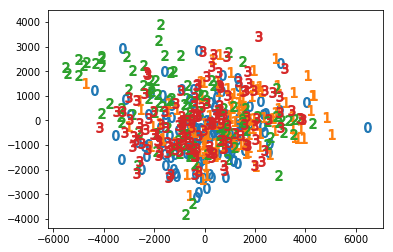

In [19]:
# Group images by digit

for label in range(10): # 0,1,2,3..9
    # Images of this digit
    idx = (labels == label)
    
    # Plot images
    plt.scatter(
        pixel_components[idx, 0], pixel_components[idx, 1],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=100 # Size of each marker
    )
    

### From the PCA of the pixels nothing really clears seems to emerge as insight